In [ ]:
#Load model training histories from subdirectory
#Subdir pattern is "model_#_{name}_training_history.pkl"


In [7]:
import os
import pickle

def load_all_model_histories(directory='.'):
    """
    Loads all model training history files from the specified directory.
    Files must match the pattern 'model_#_{name}_training_history.pkl'.
    Returns a dictionary with keys as model names and values as loaded histories.
    """
    
    #Get folders that match pattern of "model_"
    folders = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d)) and d.startswith('model_')]
    
    histories = {}
    for folder in folders:
        #Get model name from folder - everything after "model_#_"
        model_name = folder[len('model_#_'):]
        for fname in os.listdir(os.path.join(directory, folder)):
            if fname.endswith('_training_history.pkl'):
                with open(os.path.join(directory, folder, fname), 'rb') as f:
                    histories[model_name] = pickle.load(f)
    return histories

In [8]:
hist = load_all_model_histories()
print(f"Loaded histories for models: {list(hist.keys())}")

Loaded histories for models: ['shakespeare', 'sherlock', 'doyle']


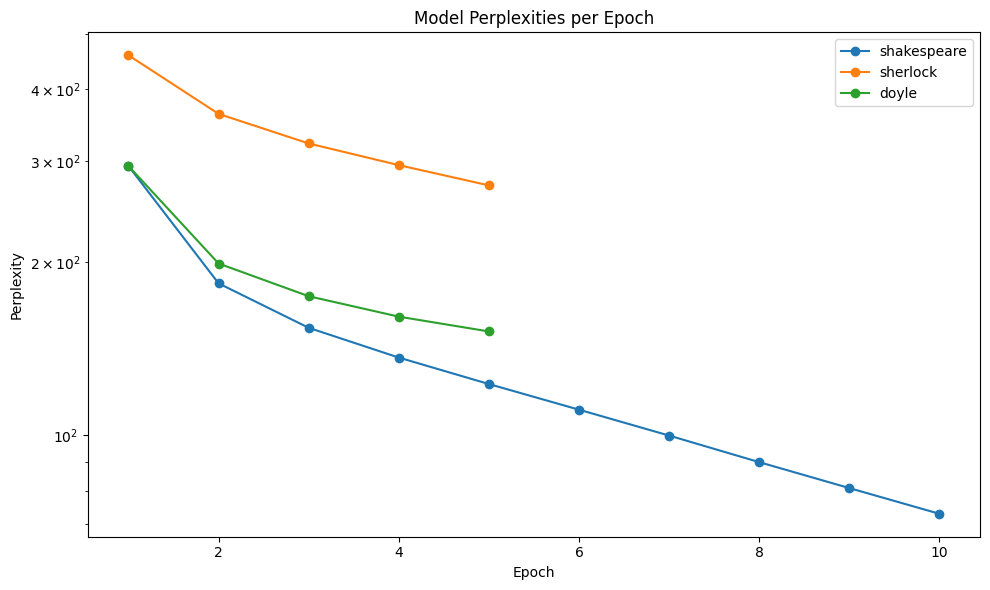

In [12]:
# Calculate perplexity for tensorflow model histories across epochs
import numpy as np

def calculate_perplexity_per_epoch(history):
    """
    Calculate perplexity for each epoch from model training history.
    Assumes history contains 'loss' key with cross-entropy loss values (one per epoch).
    Returns a list of perplexity values, one per epoch.
    """
    if 'loss' not in history:
        raise ValueError("History does not contain 'loss' key.")
    losses = history['loss']
    perplexities = [np.exp(loss) for loss in losses]
    return perplexities

# Overlay all perplexities onto one graph
import matplotlib.pyplot as plt
def plot_perplexities_per_epoch(histories):
    """
    Plots perplexities per epoch for multiple model histories.
    """
    plt.figure(figsize=(10, 6))
    for model_name, history in histories.items():
        perplexities = calculate_perplexity_per_epoch(history)
        plt.plot(range(1, len(perplexities)+1), perplexities, marker='o', label=model_name)
    plt.ylabel('Perplexity')
    plt.xlabel('Epoch')
    plt.title('Model Perplexities per Epoch')
    plt.yscale('log')  # Perplexity can vary widely, use log scale
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_perplexities_per_epoch(hist)